<a href="https://colab.research.google.com/github/ChintzRuparel/Image-Processing/blob/main/IP_Expt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IP-Experiment no. 03 : IMAGE ENHANCEMENT

Aim: <br>
a. For the given test image, apply power law transformation with gamma <br>
b.For the given low contrast image, apply thresholding and contrast stretching point processing techniques to enhance the image.

## Power-law (gamma) transformations can be mathematically expressed as $s = cr^{\gamma}$

 Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. <br>
 If, s is the output intensity, an r is the input intensity of the pixel, and $\gamma$ is the intensity correction factor


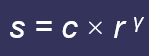

Text(0.5, 1.0, 'Binary Image')

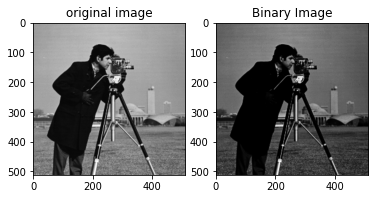

In [ ]:

img=io.imread('cameraman.tif')
r,c = img.shape
I=img.copy()
gamma=2
for i in range(r):
  for j in range(c):
    img[i,j]=((img[i,j]/255)**gamma)*255

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Binary Image')

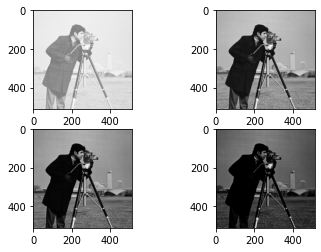

In [ ]:

img=io.imread('cameraman.tif')
r,c=img.shape
i=1
for gamma in [0.2,0.8,1.2,2.2]:
  output=np.array((((img/255)**gamma)*255),dtype='uint8')
  plt.subplot(2,2,i)
  plt.imshow(output,cmap='gray')
  i=i+1  

Students have to comment on the enhancement results obtained for gamma less than 1 and gamma > 1

# Thresholding

Thresholding: is simplest method of segmentation in order to isolate the object from the background <br>



#Equation to implement thresholding
 s=L-1 for r > threshold<br> 
and s= 0 for r < threshold

Enter threshhold=128


Text(0.5, 1.0, 'Binary Image')

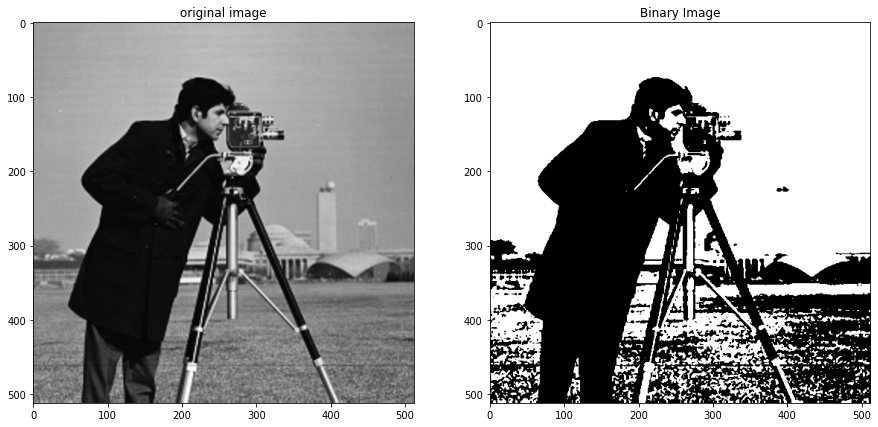

In [ ]:

import numpy as np
from skimage import io
import matplotlib.pyplot as plt
img=io.imread('cameraman.tif')
r,c = img.shape
t= int(input('Enter threshhold='))
I=img.copy()
for i in range(r):
  for j in range(c):
    if img[i,j] > t:
      img[i,j]=255
    else:
      img[i,j]=0


plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Binary Image')

Digital Negative


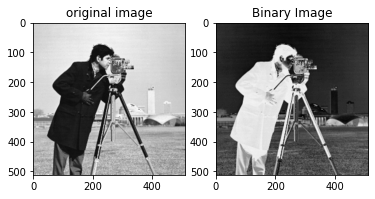

In [3]:
cimg=io.imread('cameraman.tif')
r,c = img.shape
I=img.copy()
for i in range(r):
  for j in range(c):
    img[i,j]=255-img[i,j]

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Binary Image')

imgt=img.copy()

# Contrast stretching using Piecewise-Linear Transformation Functions<br>

Concept:<br>
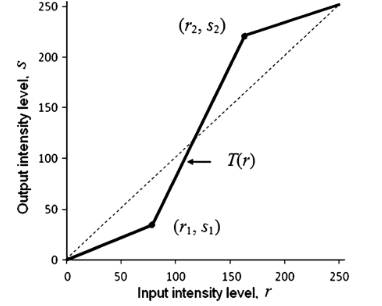

With (r1, s1), (r2, s2) as parameters, the function stretches the intensity levels <br>
Contrast stretching decreases the intensity of the dark pixels and increases the intensity of the light pixels. <br>
If r1 = s1 = 0 and r2 = s2 = L-1, the function becomes a straight dotted line in the graph (which gives no effect).

# Equation for contrast Stretching to be implemented

$Slope 1 = (s1-0)/(r1-0)$<br>
$Slope 2 = (s2-s1)/(r2-r1)$<br>
$Slope 3 = (255-s2)/(255-r2)$<br>

$Input pixel = r$ <br>
$Output pixel, S $<br>

S = Slope1.r,                 0 $\le$ r $\le$ r1<br>
  = Slope 2.(r-r1)+s1,        r1$\le$r$\le$r2<br>
  = Slope3 (r-r2)+s2,         r2$\le$r$\le$L-1  



Text(0.5, 1.0, 'Contrast stretched image')

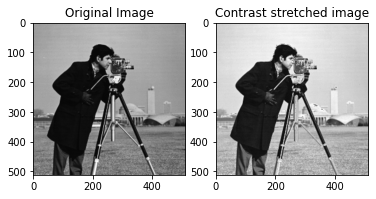

In [2]:
from skimage import io
import matplotlib.pyplot as plt
img = io.imread('cameraman.tif')
r,c = img.shape
r1 = 50
s1 = 100
r2 = 200
s2 = 120
slope1 = s1/r1
slope2 = (255-s1)/(r2-r1)
slope3 = (255-s2)/(255-r2)
I = img.copy()
for i in range(r):
  for j in range(c):
    if img[i,j] <= r1:
      img[i,j] = slope1 * img[i,j]
    elif r1 < img[i,j] < r2:
      img[i,j] = slope2 * (img[i,j] - r1) + s1
    else:
      img[i,j] = slope3 * (img[i,j] - r2) + s2
plt.subplot(121)
plt.imshow(I, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img, cmap = 'gray')
plt.title('Contrast stretched image')

Plot the figures for thresholding and contrast stretching

Text(0.5, 1.0, 'Contrast Streched Image')

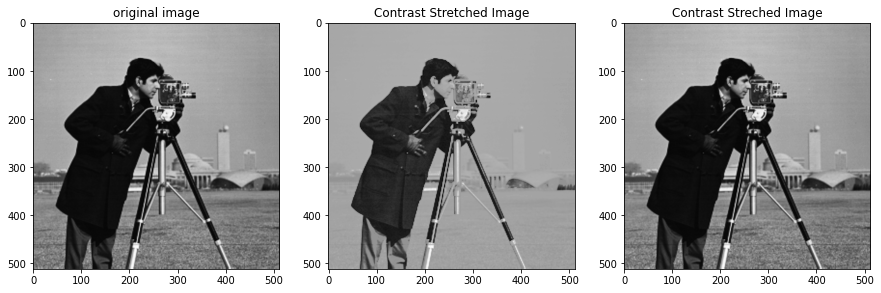

In [9]:
from skimage import io 
import matplotlib.pyplot as plt
img= io.imread('cameraman.tif')
r,c=img.shape
r1=50
s1=100
r2=200
s2=120
slope1=s1/r1
slope2=(s2-s1)/(r2-r1)
slope3=(255-52)/(255-51)
I=img.copy()
I

for i in range(r):
  for j in range(c):
    if 0<=img[i,j]<= r1:
      img[i,j]=slope1*img[i,j]
    elif r1<img[i,j]<=r2:
      img[i,j]=slope2*(img[i,j]-r1)+s1
    else:
      img[i,j]=slope3*(img[i,j]-r2)+s2

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(I, cmap='gray')
plt.title('original image')
plt.subplot(132)
plt.imshow(img,cmap='gray')
plt.title('Contrast Stretched Image')
plt.subplot(133)
plt.imshow(I, cmap='gray')
plt.title('Contrast Streched Image')






Comment on the comparison and performance of both the techniques. 

# Conclusion

We implemented the code for image enhancement using point processing methods such as 
- Thresholding 
- Contrast Stretching 
- Power Law Transformation 

Thresholding is used to convert any grayscale image into Binary Image 

Power Law Transformaiton is used to darken a bleached image by setting gamma greater than 1 and brighten a dark image setting gamma less than 1 

Digital Negative is used to reverse the gray shade i.e.Dark grey becomes light grey and vice versa. It is used to create X-Ray Images 

Contrast Stretching allows us to discriminate between user defined values also allows to adjust the different shades. 